In [95]:
import pandas as pd
import numpy as np
import ta
from binance import Client
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
client = Client(API_KEY, SECRET_KEY)

In [30]:
df = pd.DataFrame(client.get_historical_klines('ETHUSDT', '1m', '100 min ago UTC'))

In [33]:
df = df.iloc[:, :6]

In [34]:
df.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']

In [35]:
df

,Time,Open,High,Low,Close,Volume
0,1659878400000,1704.50000000,1706.93000000,1704.44000000,1706.92000000,331.62260000
1,1659878460000,1706.92000000,1706.93000000,1706.14000000,1706.15000000,193.95380000
2,1659878520000,1706.15000000,1706.22000000,1704.35000000,1705.35000000,268.01680000
3,1659878580000,1705.35000000,1708.07000000,1705.35000000,1707.50000000,407.83300000
4,1659878640000,1707.50000000,1708.37000000,1707.04000000,1707.12000000,238.23200000
...,...,...,...,...,...,...
95,1659884100000,1704.00000000,1704.01000000,1702.97000000,1703.34000000,180.10230000
96,1659884160000,1703.34000000,1704.07000000,1703.19000000,1703.19000000,98.12280000
97,1659884220000,1703.19000000,1704.49000000,1702.98000000,1704.16000000,186.10890000
98,1659884280000,1704.17000000,1705.00000000,1704.16000000,1704.18000000,180.45070000


In [43]:
df.index = pd.to_datetime(df['Time'], unit='ms')

In [48]:
df = df.astype(float)

In [73]:
df

,Time,Open,High,Low,Close,Volume
Time,,,,,,
2022-08-07 13:20:00,1.659878e+12,1704.50,1706.93,1704.44,1706.92,331.6226
2022-08-07 13:21:00,1.659878e+12,1706.92,1706.93,1706.14,1706.15,193.9538
2022-08-07 13:22:00,1.659879e+12,1706.15,1706.22,1704.35,1705.35,268.0168
2022-08-07 13:23:00,1.659879e+12,1705.35,1708.07,1705.35,1707.50,407.8330
2022-08-07 13:24:00,1.659879e+12,1707.50,1708.37,1707.04,1707.12,238.2320
...,...,...,...,...,...,...
2022-08-07 14:55:00,1.659884e+12,1704.00,1704.01,1702.97,1703.34,180.1023
2022-08-07 14:56:00,1.659884e+12,1703.34,1704.07,1703.19,1703.19,98.1228
2022-08-07 14:57:00,1.659884e+12,1703.19,1704.49,1702.98,1704.16,186.1089


In [89]:
df['%K'] = ta.momentum.stoch(df.High, df.Low, df.Close)

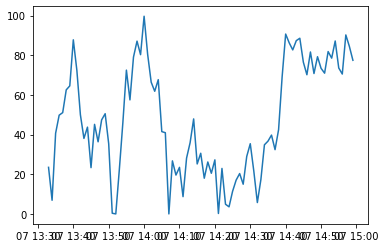

In [90]:
plt.plot(ta.momentum.stoch(df.High, df.Low, df.Close))

In [93]:
df['%D'] = df['%K'].rolling(3).mean()

In [94]:
df['rsi'] = ta.momentum.rsi(df.Close, window=14)

In [96]:
df['macd'] = ta.trend.macd_diff(df.Close)

In [98]:
df = df.dropna()

In [103]:
df

,Time,Open,High,Low,Close,Volume,%K,%D,rsi,macd
Time,,,,,,,,,,
2022-08-07 13:53:00,1.659880e+12,1703.81,1705.10,1703.73,1704.66,112.5644,22.302158,7.546286,40.750310,-0.199069
2022-08-07 13:54:00,1.659880e+12,1704.66,1705.72,1704.66,1705.65,63.3098,46.043165,22.781775,47.333861,-0.127031
2022-08-07 13:55:00,1.659880e+12,1705.65,1706.63,1705.65,1706.63,67.0214,72.500000,46.948441,52.911663,-0.009671
2022-08-07 13:56:00,1.659881e+12,1706.62,1707.08,1706.02,1706.03,199.1008,57.500000,58.681055,49.458015,0.029134
2022-08-07 13:57:00,1.659881e+12,1706.02,1707.98,1706.02,1707.09,229.8088,79.058824,69.686275,55.041185,0.122539
...,...,...,...,...,...,...,...,...,...,...
2022-08-07 14:55:00,1.659884e+12,1704.00,1704.01,1702.97,1703.34,180.1023,73.577236,79.775325,57.874230,0.412535
2022-08-07 14:56:00,1.659884e+12,1703.34,1704.07,1703.19,1703.19,98.1228,70.528455,77.100271,56.972939,0.359777
2022-08-07 14:57:00,1.659884e+12,1703.19,1704.49,1702.98,1704.16,186.1089,90.243902,78.116531,61.182813,0.368511


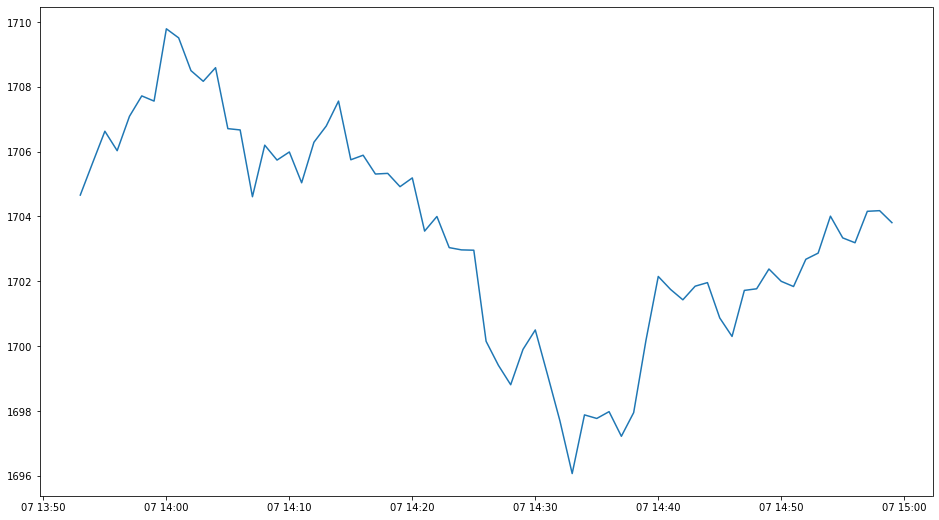

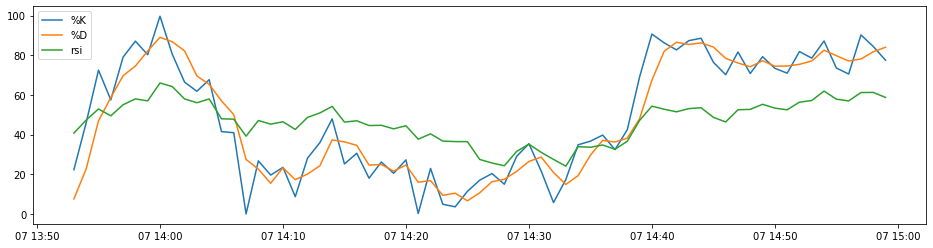

In [115]:
plt.figure(figsize=(16,9))
plt.plot(df.Close)
plt.show()


plt.figure(figsize=(16,4))
plt.plot(df[['%K', '%D', 'rsi']], label=['%K', '%D', 'rsi'])
plt.legend(loc="upper left")
plt.show()